In [53]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler  
import seaborn as sns

%matplotlib inline

In [2]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv('anonymized-curriculum-access.csv')


In [3]:
#colnames=[{0:"date", 1:"time", 2:"page", 3:"num1", 4:"num2", 5:"ip"}]
df_orig = pd.read_csv('anonymized-curriculum-access.csv',
                 header=None,
                 sep= " "
)



df = df_orig
df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [4]:
df = df.rename(columns={0:"date", 1:"time", 2:"page", 3:"id", 4:"group", 5:"ip"})

df.describe()

,id,group
count,399195.000000,372441.000000
mean,268.794667,26.912649
std,147.587312,7.846146
min,1.000000,1.000000
25%,157.000000,23.000000
50%,288.000000,27.000000
75%,392.000000,31.000000
max,543.000000,52.000000


In [5]:
df= df.drop(columns=['date', 'time'])

df.head()

,page,id,group,ip
0,/,1,8.0,97.105.19.61
1,java-ii,1,8.0,97.105.19.61
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,slides/object_oriented_programming,1,8.0,97.105.19.61
4,javascript-i/conditionals,2,22.0,97.105.19.61


In [6]:
df.dropna(axis=1)
#df= df.set_index(df['group'])
df.isnull().sum()

page         0
id           0
group    26754
ip           0
dtype: int64

In [7]:
df= df[['group', 'id']]


In [8]:

df.isnull().sum()

group    26754
id           0
dtype: int64

In [9]:
df = df[["group", "id"]]

In [10]:

df.dropna()
df.dropna(inplace=True)
df = df.astype(float)

In [11]:
np_array = df.values.astype("float32", copy = False)

In [12]:
scaler = MinMaxScaler().fit(np_array)
np_array = scaler.transform(np_array)
np_array[0:10]

array([[0.13725491, 0.        ],
       [0.13725491, 0.        ],
       [0.13725491, 0.        ],
       [0.13725491, 0.        ],
       [0.4117647 , 0.00184502],
       [0.4117647 , 0.00184502],
       [0.4117647 , 0.00369004],
       [0.4117647 , 0.00369004],
       [0.4117647 , 0.00184502],
       [0.4117647 , 0.00553506]], dtype=float32)

In [13]:
df= pd.read_csv('customers.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
df.drop(["Channel", "Region"], axis = 1, inplace = True)
df = df[["Grocery", "Frozen","Detergents_Paper"]]

In [15]:
df.head()

,Grocery,Frozen,Detergents_Paper
0,7561,214,2674
1,9568,1762,3293
2,7684,2405,3516
3,4221,6404,507
4,7198,3915,1777


In [16]:
np_array = df.values.astype("float32", copy = False)
np_array[0:10]

array([[ 7561.,   214.,  2674.],
       [ 9568.,  1762.,  3293.],
       [ 7684.,  2405.,  3516.],
       [ 4221.,  6404.,   507.],
       [ 7198.,  3915.,  1777.],
       [ 5126.,   666.,  1795.],
       [ 6975.,   480.,  3140.],
       [ 9426.,  1669.,  3321.],
       [ 6192.,   425.,  1716.],
       [18881.,  1159.,  7425.]], dtype=float32)

In [17]:
scaler = MinMaxScaler().fit(np_array)
np_array = scaler.transform(np_array)
np_array[0:10]

array([[0.08146416, 0.0031063 , 0.0654272 ],
       [0.10309667, 0.02854842, 0.08058985],
       [0.08278991, 0.03911643, 0.08605233],
       [0.04546386, 0.1048419 , 0.01234568],
       [0.07755155, 0.063934  , 0.04345483],
       [0.05521843, 0.01053514, 0.04389575],
       [0.07514793, 0.00747814, 0.07684205],
       [0.10156612, 0.02701992, 0.08127572],
       [0.06670834, 0.00657419, 0.04196061],
       [0.20347716, 0.01863783, 0.18180482]], dtype=float32)

In [18]:
dbsc = DBSCAN(eps = .5, min_samples = 20).fit(np_array)

In [19]:
# Now, let's add the scaled value columns back onto the dataframe
columns = list(df.columns)
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])

In [20]:
labels = dbsc.labels_
labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
df['labels'] = labels
df.labels.value_counts()

 0    439
-1      1
Name: labels, dtype: int64

In [22]:
df[df.labels==-1].head()

,Grocery,Frozen,Detergents_Paper,Scaled_Grocery,Scaled_Frozen,Scaled_Detergents_Paper,labels
85,92780,1026,40827,1.0,0.016452,1.0,-1


In [23]:
# Let's look at the descriptive stats for the entire population, the inliers, then the outliers/anomalies
print("Population")
print(df.describe())
print("-------------")
print("Inliers")
print(df[df.labels==0].describe())
print("-------------")
print("Outliers")
print(df[df.labels==-1].describe())

Population
            Grocery        Frozen  Detergents_Paper  Scaled_Grocery  \
count    440.000000    440.000000        440.000000      440.000000   
mean    7951.277273   3071.931818       2881.493182        0.085671   
std     9503.162829   4854.673333       4767.854448        0.102430   
min        3.000000     25.000000          3.000000        0.000000   
25%     2153.000000    742.250000        256.750000        0.023174   
50%     4755.500000   1526.000000        816.500000        0.051225   
75%    10655.750000   3554.250000       3922.000000        0.114821   
max    92780.000000  60869.000000      40827.000000        1.000000   

       Scaled_Frozen  Scaled_Detergents_Paper      labels  
count     440.000000               440.000000  440.000000  
mean        0.050078                 0.070510   -0.002273  
std         0.079789                 0.116790    0.047673  
min         0.000000                 0.000000   -1.000000  
25%         0.011788                 0.006216    

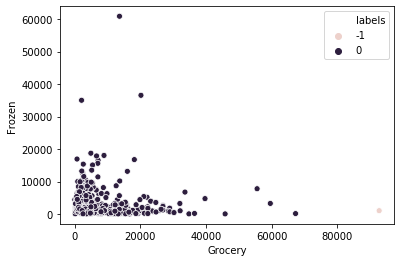

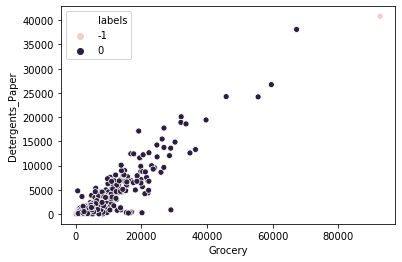

In [24]:
sns.scatterplot(df.Grocery, df.Frozen, hue=df.labels)
plt.show()

sns.scatterplot(df.Grocery, df.Detergents_Paper, hue=df.labels)
plt.show()

Text(0.5, 0, 'Grocery')

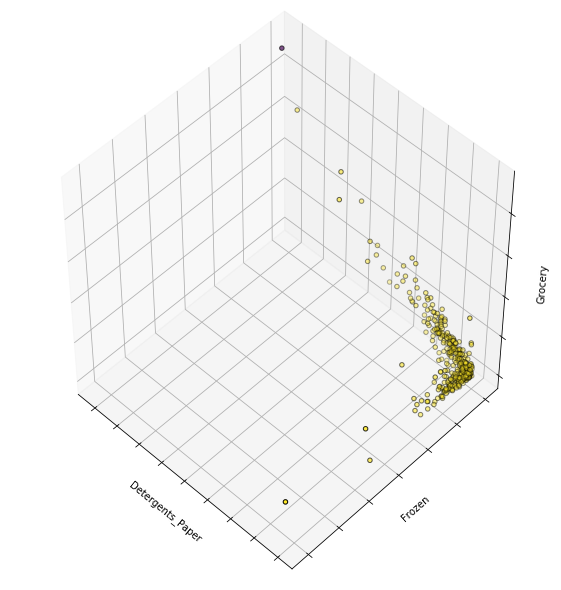

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Detergents_Paper, df.Frozen, df.Grocery,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Detergents_Paper')
ax.set_ylabel('Frozen')
ax.set_zlabel('Grocery')

Zillow Data- Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [26]:
dfl= pd.read_csv('lemonade.csv')

In [27]:
dfl.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [28]:
dfl.set_index('Day')
dfl= dfl.drop(['Date', 'Day'], axis= 1)
dfl.head()

,Temperature,Rainfall,Flyers,Price,Sales
0,27.0,2.00,15,0.5,10
1,28.9,1.33,15,0.5,13
2,34.5,1.33,27,0.5,15
3,44.1,1.05,28,0.5,17
4,42.4,1.00,33,0.5,18


In [62]:
dfl.describe()

,Temperature,Sales,labels
count,365.000000,365.000000,365.0
mean,61.224658,27.589041,-1.0
std,18.085892,29.979680,0.0
min,15.100000,7.000000,-1.0
25%,49.700000,20.000000,-1.0
50%,61.100000,25.000000,-1.0
75%,71.700000,30.000000,-1.0
max,212.000000,534.000000,-1.0


In [39]:
dfl = dfl[["Temperature", "Sales"]]

In [40]:
#Scale to standard normal:
np_array = dfl.values.astype("float32", copy = False)

In [44]:
stscaler = StandardScaler().fit(np_array)

In [45]:
stscaler.transform(np_array)

array([[-1.89493763e+00, -5.87504089e-01],
       [-1.78973913e+00, -4.87298965e-01],
       [-1.47968042e+00, -4.20495540e-01],
       [-9.48151469e-01, -3.53692114e-01],
       [-1.04227626e+00, -3.20290387e-01],
       [-1.98906267e+00, -5.54102421e-01],
       [-1.56826854e+00, -4.87298965e-01],
       [-1.31357765e+00, -4.20495540e-01],
       [-1.28035712e+00, -3.53692114e-01],
       [-9.86908615e-01, -3.20290387e-01],
       [-1.58487904e+00, -5.20700693e-01],
       [-1.27482021e+00, -4.53897268e-01],
       [-1.31357765e+00, -4.20495540e-01],
       [-9.48151469e-01, -3.53692114e-01],
       [-9.86908615e-01, -3.20290387e-01],
       [-1.69561410e+00, -5.20700693e-01],
       [-1.60702598e+00, -4.53897268e-01],
       [-1.02012932e+00, -3.87093842e-01],
       [-1.00351906e+00, -3.53692114e-01],
       [-1.64024651e+00, -5.20700693e-01],
       [-1.38555551e+00, -4.53897268e-01],
       [-1.13086450e+00, -3.87093842e-01],
       [-1.28035712e+00, -3.53692114e-01],
       [-1.

In [58]:
#Create DBSCAN object and fit: 
dbscl = DBSCAN(eps = .75, min_samples = 15).fit(np_array)

In [59]:
labels = dbsc.labels_

In [60]:
dfl['labels'] = labels

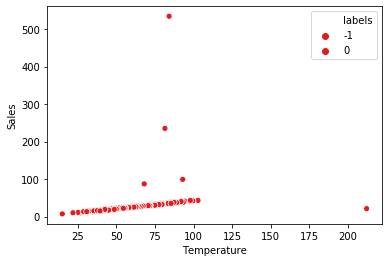

In [73]:
dfl.labels.value_counts() 
sns.scatterplot(dfl.Temperature, dfl.Sales, hue=dfl.labels, palette="Set1")

In [75]:
dfl['labels'] = labels
dfl.labels.value_counts()

-1    365
Name: labels, dtype: int64

In [76]:
dfl[dfl.labels==-1].head()

,Temperature,Sales,labels
0,27.0,10,-1
1,28.9,13,-1
2,34.5,15,-1
3,44.1,17,-1
4,42.4,18,-1
